<a href="https://colab.research.google.com/github/katherine2022Udea/TesisEspecializacion/blob/main/1_Depuracion_Base_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) **Objetivo**

*Predecir la supervivencia del cáncer de mama aplicando modelos de clasificación.*

https://www.kaggle.com/raghadalharbi/breast-cancer-gene-expression-profiles-metabric

# **2) Descripción de los Datos**

La base de datos del Consorcio Internacional de Taxonomía Molecular del Cáncer de Mama (METABRIC) es un proyecto de Canadá-Reino Unido que contiene datos de  de 1.980 muestras de cáncer de mama primario. Los datos clínicos y genómicos se descargaron de cBioPortal.

El conjunto de datos fue recopilado por el profesor Carlos Caldas del Cambridge Research Institute y el profesor Sam Aparicio del British Columbia Cancer Center en Canadá y publicado en Nature Communications (Pereira et al., 2016). También apareció en varios artículos, incluidos Nature y otros:

* Associations between genomic stratification of breast cancer and centrally reviewed tumor pathology in the METABRIC cohort
https://www.nature.com/articles/s41523-018-0056-8

* Predicting Outcomes of Hormone and Chemotherapy in the Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) Study by Biochemically-inspired Machine Learning https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5461908/

Atributos clínicos en el conjunto de datos:

## **A) Importar Base de Datos**

In [ ]:
import numpy as np # Matemetias y Matrices
import pandas as pd # para BD
import matplotlib.pyplot as plt # Graficas
import seaborn as sns # Graficas estadisticas
from scipy.stats import shapiro # Pruebas Estadisticas
from scipy.stats import chi2_contingency # Pruebas de Independencia para Tablas de contingencia
from scipy import stats
### Modelación de Machine Learning
from sklearn.model_selection import train_test_split # Para dividir nuesntra BD en entrenamiento y Test
import statsmodels.api as sm
from scipy.stats import normaltest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url='https://raw.githubusercontent.com/katherine2022Udea/TesisEspecializacion/main/METABRIC_RNA_Mutation.csv'
df=pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(df.shape)

(1904, 693)


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
df.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,...,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,cdh1_mut,dnah2_mut,kmt2d_mut,ush2a_mut,ryr2_mut,dnah5_mut,herc2_mut,pde4dip_mut,akap9_mut,tg_mut,birc6_mut,utrn_mut,tbx3_mut,col6a3_mut,arid1a_mut,lama2_mut,notch1_mut,cbfb_mut,ncor2_mut,col12a1_mut,col22a1_mut,pten_mut,akt1_mut,atr_mut,thada_mut,ncor1_mut,stab2_mut,myh9_mut,runx1_mut,nf1_mut,map2k4_mut,ros1_mut,lamb3_mut,arid1b_mut,erbb2_mut,sf3b1_mut,shank2_mut,ep300_mut,ptprd_mut,usp9x_mut,setd2_mut,setd1a_mut,thsd7a_mut,afdn_mut,erbb3_mut,rb1_mut,myo1a_mut,alk_mut,fanca_mut,adgra2_mut,ubr5_mut,pik3r1_mut,myo3a_mut,asxl2_mut,apc_mut,ctcf_mut,asxl1_mut,fancd2_mut,taf1_mut,kdm6a_mut,ctnna3_mut,brca1_mut,ptprm_mut,foxo3_mut,usp28_mut,gldc_mut,brca2_mut,cacna2d3_mut,arid2_mut,aff2_mut,lifr_mut,sbno1_mut,kdm3a_mut,ncoa3_mut,bap1_mut,l1cam_mut,pbrm1_mut,chd1_mut,jak1_mut,setdb1_mut,fam20c_mut,arid5b_mut,egfr_mut,map3k10_mut,smarcc2_mut,erbb4_mut,npnt_mut,nek1_mut,agmo_mut,zfp36l1_mut,smad4_mut,sik1_mut,casp8_mut,prkcq_mut,smarcc1_mut,palld_mut,dcaf4l2_mut,bcas3_mut,cdkn1b_mut,gps2_mut,men1_mut,stk11_mut,sik2_mut,ptpn22_mut,brip1_mut,flt3_mut,nrg3_mut,fbxw7_mut,ttyh1_mut,taf4b_mut,or6a2_mut,map3k13_mut,hdac9_mut,prkacg_mut,rpgr_mut,large1_mut,foxp1_mut,clk3_mut,prkcz_mut,lipi_mut,ppp2r2a_mut,prkce_mut,gh1_mut,gpr32_mut,kras_mut,nf2_mut,chek2_mut,ldlrap1_mut,clrn2_mut,acvrl1_mut,agtr2_mut,cdkn2a_mut,ctnna1_mut,magea8_mut,prr16_mut,dtwd2_mut,akt2_mut,braf_mut,foxo1_mut,nt5e_mut,ccnd3_mut,nr3c1_mut,prkg1_mut,tbl1xr1_mut,frmd3_mut,smad2_mut,sgcd_mut,spaca1_mut,rasgef1b_mut,hist1h2bc_mut,nr2f1_mut,klrg1_mut,mbl2_mut,mta

In [ ]:
df.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

## **B) Diccionario de Variables**

* patient_id: ID del paciente
* ageatdiagnosis:Edad de la paciente al momento del diagnóstico. 
* typeofbreast_surgery:Tipo de cirugía de cáncer de mama: 1- MASTECTOMÍA, que se refiere a una cirugía para extirpar todo el tejido mamario de una mama como una forma de tratar o prevenir el cáncer de mama. 2- CONSERVADORA DE MAMA, que se refiere a una urgencia donde solo la parte de la mama que tiene cancer se remueve
* cancer_type: Tipos de cáncer de mama: 1- Cáncer de mama o 2- Sarcoma de mama
* cancertypedetailed: Tipos detallados de cáncer de mama: 1- Carcinoma ductal invasivo de mama 2- Carcinoma ductal y lobulillar mixto de mama 3- Carcinoma lobular invasivo de mama 4- Carcinoma mucinoso mixto invasivo de mama 5- Cáncer de mama metaplásico
* cellularity: Celularidad del cáncer después de la quimioterapia, que se refiere a la cantidad de células tumorales en la muestra y su disposición en grupos.
* chemotherapy: Si la paciente recibió quimioterapia como tratamiento (sí / no)
* pam50+claudin-low_subtype: Pam 50: es una prueba de perfil tumoral que ayuda a mostrar si es probable que algunos cánceres de mama con receptores de estrógeno positivos (ER positivos) y HER2 negativos hagan metástasis (cuando el cáncer de mama se disemina a otros órganos). El subtipo de cáncer de mama con claudina baja se define por las características de expresión génica, principalmente: baja expresión de genes de adhesión célula-célula, alta expresión de genes de transición epitelial-mesenquimatosa (EMT) y patrones de expresión génica similares a células madre / menos diferenciados
* cohort: La cohorte es un grupo de sujetos que comparten una característica definitoria (toma un valor de 1 a 5)
* erstatusmeasuredbyihc: Para evaluar si los receptores de estrógeno se expresan en las células cancerosas mediante el uso de inmunohistoquímica (un tinte utilizado en patología que se dirige a un antígeno específico, si está allí, dará un color, no está allí, el tejido del portaobjetos se coloreará ) (positivo negativo)
* er_status: Las células cancerosas son positivas o negativas para los receptores de estrógeno
* neoplasmhistologicgrade: Determinado por patología al observar la naturaleza de las células, se ven agresivas o no (toma un valor de 1 a 3)
* her2statusmeasuredbysnp6: Evaluar si el cáncer es positivo para HER2 o no mediante el uso de técnicas moleculares avanzadas (tipo de secuenciación de próxima generación)
* her2_status: Si el cáncer es positivo o negativo para HER2
* tumorotherhistologic_subtype: Tipo de cáncer basado en el examen microscópico del tejido canceroso (toma un valor de 'Ductal / NST', 'Mixto', 'Lobular', 'Tubular / cribiforme', 'Mucinoso', 'Medular', 'Otro', 'Metaplástico')
* hormone_therapy: Si la paciente tuvo tratamiento hormonal o no (sí / no)
* inferredmenopausalstate: Si la paciente es posmenopáusica o no (post / pre)
* integrative_cluster: Subtipo molecular del cáncer basado en alguna expresión genética (toma un valor de '4ER +', '3', '9', '7', '4ER-', '5', '8', '10', ' 1 ',' 2 ',' 6 ')
* primarytumorlaterality: Ya sea que involucre el seno derecho o el izquierdo
* lymphnodesexamined_positive: Para tomar muestras del ganglio linfático durante la cirugía y ver si estaba involucrado por el cáncer.
* mutation_count: Número de gen que tiene mutaciones relevantes
* nottinghamprognosticindex: Se utiliza para determinar el pronóstico después de una cirugía por cáncer de mama. Su valor se calcula utilizando tres criterios patológicos: el tamaño del tumor; el número de ganglios linfáticos afectados; y el grado del tumor.
* oncotree_code: OncoTree es una ontología de código abierto que se desarrolló en el Memorial Sloan Kettering Cancer Center (MSK) para estandarizar el diagnóstico de tipos de cáncer desde una perspectiva clínica al asignar a cada diagnóstico un código OncoTree único.
* overallsurvivalmonths: Duración desde el momento de la intervención hasta la muerte
* **overall_survival: Variable objetivo si el paciente está vivo o muerto**.
* pr_status: Las células cancerosas son positivas o negativas para los receptores de progesterona
* radio_therapy: Si el paciente recibió radio como tratamiento (sí / no)
* 3-geneclassifiersubtype: Subtipo de clasificador de tres genes Toma un valor de 'ER- / HER2-', 'ER + / HER2- High Prolif', nan, 'ER + / HER2- Low Prolif', 'HER2 +'
* tumor_size: Tamaño del tumor medido por técnicas de imagen.
* Etapa del cáncer según la participación de las estructuras circundantes, los ganglios linfáticos y la diseminación a distancia
* deathfromcancer:Si la muerte del paciente se debió a cáncer o no (sí / no)

Atributos genéticos en el conjunto de datos:
La parte genética del conjunto de datos contiene la puntuación z de los niveles de ARNm para 331 genes y la mutación para 175 genes.

Desde CBioPortal:

¿Qué son los ARNm?
Las moléculas de ADN unidas a cada portaobjetos actúan como sondas para detectar la expresión génica, que también se conoce como transcriptoma o el conjunto de transcripciones de ARN mensajero (ARNm) expresadas por un grupo de genes. Para realizar un análisis de microarrays, las moléculas de ARNm se recolectan típicamente tanto de una muestra experimental como de una muestra de referencia.

¿Qué son las puntuaciones Z de ARNm?
Para los datos de expresión de ARNm, se realizan los cálculos de la expresión relativa de un gen individual y un tumor a la distribución de expresión del gen en una población de referencia. Esa población de referencia son todas las muestras del estudio. El valor devuelto indica el número de desviaciones estándar de la media de expresión en la población de referencia (puntuación Z). Esta medida es útil para determinar si un gen está regulado hacia arriba o hacia abajo en relación con las muestras normales o con todas las demás muestras tumorales.

The formula is :

z = (expression in tumor sample - mean expression in reference sample) / standard deviation of expression in reference sample

In [ ]:
df["death_from_cancer"].value_counts()

Living                  801
Died of Disease         622
Died of Other Causes    480
Name: death_from_cancer, dtype: int64

In [ ]:
## Eliminamos las pacientes que mueren a cuasa de otras enfermedades
df=df[df["death_from_cancer"]!="Died of Other Causes"]

In [ ]:
df["death_from_cancer"].value_counts()

Living             801
Died of Disease    622
Name: death_from_cancer, dtype: int64

In [ ]:
df["overall_survival"].value_counts()

1    801
0    623
Name: overall_survival, dtype: int64

**Se elimina la Variable patient_id**

In [ ]:
## Eliminar ID
df=df.drop(["patient_id"],axis=1)

## **C) Revision Datos Nulos**

In [ ]:
Variables=df.columns.to_list()
print(f'Total Variables : {len(Variables)}')

Total Variables : 692


In [ ]:
#Calculo del porcentaje de nulos
Nulos=[]
Variable=[]
TipoVariable=[]
for i in Variables:
  Variable.append(i)
  Nulos.append(df[i].isnull().sum())
  TipoVariable.append(df[i].dtype)
NULOS=pd.DataFrame({"Variable":Variable,"Nulos":Nulos,"TipoVariable":TipoVariable})
NULOS["PorcentajeNulos"]=(NULOS["Nulos"]/len(df))*100
NAS=NULOS[NULOS["Nulos"]>0] .sort_values("PorcentajeNulos",ascending=False)
NAS

,Variable,Nulos,TipoVariable,PorcentajeNulos
28,tumor_stage,343,float64,24.087079
26,3-gene_classifier_subtype,149,object,10.463483
17,primary_tumor_laterality,80,object,5.617978
4,cellularity,42,object,2.949438
19,mutation_count,39,float64,2.738764
10,neoplasm_histologic_grade,38,float64,2.668539
8,er_status_measured_by_ihc,20,object,1.404494
1,type_of_breast_surgery,16,object,1.123596
27,tumor_size,12,float64,0.842697
3,cancer_type_detailed,10,object,0.702247


### **Técnicas para el tratamiento de valores faltantes**

Existen multitud de procedimientos para aplicar cuando tenemos valores perdidos. Aunque básicamente existen dos aproximaciones posibles:

* Eliminar muestras o variables que tienen datos faltantes.
* Imputar los valores perdidos, es decir, sustituirlos por estimaciones.

#### **Imputación**

Las técnicas de imputación son procedimientos que estiman el valor del dato faltante. Por lo tanto, al tratarse de una estimación no se debe abusar de ellas.

##### **Sustitución para variables tipo Numérica**

El método de sustitución por la media, como es de esperar, solo se puede aplicar sobre variables que sean de tipo numérico. Existen otras alternativas como sustituir por la mediana.

###### **Imputamos mutation_count y tumor_size**

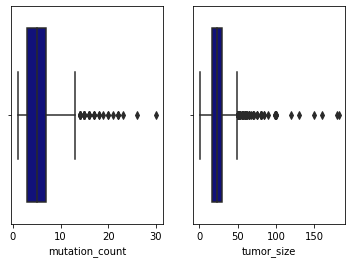

In [ ]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(x=df.mutation_count,color="darkblue", ax=axs[0])
sns.boxplot(x=df.tumor_size,color="darkblue", ax=axs[1])
plt.show()

Vemos que las dos variables presentan datos atipicos, por lo tanto se decide Imputar los valores nulos por medio de la Mediana, ya que es menos sensible a datos atipicos

In [ ]:
df.mutation_count=df.mutation_count.replace(np.nan,df.mutation_count.median())
df.tumor_size=df.tumor_size.replace(np.nan,df.tumor_size.median())

##### **Sustitución para variables tipo Categórica**

El método de sustitución por la moda es usada para variables tipo factor, es el valor que más se repite

###### **Imputacion para la Variable Categoricas**

* tumor_stage
* 3-gene_classifier_subtype
* primary_tumor_laterality
* cellularity
* er_status_measured_by_ihc
* neoplasm_histologic_grade
* cancer_type_detailed
* tumor_other_histologic_subtype

In [ ]:
print(df.tumor_stage.value_counts())
moda=stats.mode(df.tumor_stage)
print(f'La moda es : {moda[0][0]}')
df.tumor_stage=df.tumor_stage.replace(np.nan,moda[0][0])

2.0    604
1.0    369
3.0     96
4.0      9
0.0      3
Name: tumor_stage, dtype: int64
La moda es : 2.0


In [ ]:
print(df["3-gene_classifier_subtype"].value_counts())
moda=stats.mode(df["3-gene_classifier_subtype"])
df["3-gene_classifier_subtype"]=df["3-gene_classifier_subtype"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

ER+/HER2- High Prolif    433
ER+/HER2- Low Prolif     433
ER-/HER2-                242
HER2+                    167
Name: 3-gene_classifier_subtype, dtype: int64
La moda es : ER+/HER2- High Prolif


In [ ]:
print(df["primary_tumor_laterality"].value_counts())
moda=stats.mode(df["primary_tumor_laterality"])
df["primary_tumor_laterality"]=df["primary_tumor_laterality"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Left     693
Right    651
Name: primary_tumor_laterality, dtype: int64
La moda es : Left


In [ ]:
print(df["primary_tumor_laterality"].value_counts())
moda=stats.mode(df["primary_tumor_laterality"])
df["primary_tumor_laterality"]=df["primary_tumor_laterality"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Left     773
Right    651
Name: primary_tumor_laterality, dtype: int64
La moda es : Left


In [ ]:
print(df["cellularity"].value_counts())
moda=stats.mode(df["cellularity"])
df["cellularity"]=df["cellularity"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

High        706
Moderate    525
Low         151
Name: cellularity, dtype: int64
La moda es : High


In [ ]:
print(df["neoplasm_histologic_grade"].value_counts())
moda=stats.mode(df["neoplasm_histologic_grade"])
df["neoplasm_histologic_grade"]=df["neoplasm_histologic_grade"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

3.0    735
2.0    536
1.0    115
Name: neoplasm_histologic_grade, dtype: int64
La moda es : 3.0


In [ ]:
print(df["er_status_measured_by_ihc"].value_counts())
moda=stats.mode(df["er_status_measured_by_ihc"])
df["er_status_measured_by_ihc"]=df["er_status_measured_by_ihc"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Positve     1035
Negative     369
Name: er_status_measured_by_ihc, dtype: int64
La moda es : Positve


In [ ]:
print(df["type_of_breast_surgery"].value_counts())
moda=stats.mode(df["type_of_breast_surgery"])
df["type_of_breast_surgery"]=df["type_of_breast_surgery"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

MASTECTOMY           806
BREAST CONSERVING    602
Name: type_of_breast_surgery, dtype: int64
La moda es : MASTECTOMY


In [ ]:
print(df["cancer_type_detailed"].value_counts())
moda=stats.mode(df["cancer_type_detailed"])
df["cancer_type_detailed"]=df["cancer_type_detailed"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Breast Invasive Ductal Carcinoma             1137
Breast Mixed Ductal and Lobular Carcinoma     141
Breast Invasive Lobular Carcinoma             104
Breast Invasive Mixed Mucinous Carcinoma       17
Breast                                         15
Name: cancer_type_detailed, dtype: int64
La moda es : Breast Invasive Ductal Carcinoma


In [ ]:
print(df["tumor_other_histologic_subtype"].value_counts())
moda=stats.mode(df["tumor_other_histologic_subtype"])
df["tumor_other_histologic_subtype"]=df["tumor_other_histologic_subtype"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

Ductal/NST             1101
Mixed                   141
Lobular                 104
Medullary                20
Mucinous                 17
Tubular/ cribriform      16
Other                    15
Name: tumor_other_histologic_subtype, dtype: int64
La moda es : Ductal/NST


In [ ]:
print(df["oncotree_code"].value_counts())
moda=stats.mode(df["oncotree_code"])
df["oncotree_code"]=df["oncotree_code"].replace(np.nan,moda[0][0])
print(f'La moda es : {moda[0][0]}')

IDC       1137
MDLC       141
ILC        104
IMMC        17
BREAST      15
Name: oncotree_code, dtype: int64
La moda es : IDC


**Revisamos Nuevamente los valores Nulos**

In [ ]:
Nulos=[]
Variable=[]
TipoVariable=[]
for i in Variables:
  Variable.append(i)
  Nulos.append(df[i].isnull().sum())
  TipoVariable.append(df[i].dtype)
NULOS=pd.DataFrame({"Variable":Variable,"Nulos":Nulos,"TipoVariable":TipoVariable})
NULOS["PorcentajeNulos"]=(NULOS["Nulos"]/len(df))*100
NAS=NULOS[NULOS["Nulos"]>0] .sort_values("PorcentajeNulos",ascending=False)
NAS

,Variable,Nulos,TipoVariable,PorcentajeNulos
29,death_from_cancer,1,object,0.070225


#### **Eliminación de muestras** 

* Para este caso eliminamos los valores nulos de la variable death_from_cancer, que correponden al 0.07%	

In [ ]:
print(df["death_from_cancer"].value_counts())

Living             801
Died of Disease    622
Name: death_from_cancer, dtype: int64


In [ ]:
print(f'Variables con Nulos: {len(NAS)}' )

Variables con Nulos: 1


In [ ]:
df_Sin_Nulos=df.dropna()

**Proporcion que queda despues de la depuracion de los valores Nulos**

In [ ]:
(1-len(df_Sin_Nulos)/len(df))*100

0.0702247191011196

**Revisamos Nuevamente los Valores Nulos**

In [ ]:
Nulos=[]
Variable=[]
TipoVariable=[]
for i in Variables:
  Variable.append(i)
  Nulos.append(df_Sin_Nulos[i].isnull().sum())
  TipoVariable.append(df_Sin_Nulos[i].dtype)
NULOS=pd.DataFrame({"Variable":Variable,"Nulos":Nulos,"TipoVariable":TipoVariable})
NULOS["PorcentajeNulos"]=(NULOS["Nulos"]/len(df_Sin_Nulos))*100
NAS=NULOS[NULOS["Nulos"]>0] .sort_values("PorcentajeNulos",ascending=False)
NAS

,Variable,Nulos,TipoVariable,PorcentajeNulos


**No tenemos Valores Nulos**

In [ ]:
VariablesNumericas=df_Sin_Nulos._get_numeric_data().columns.to_list()
print(f'Las variables numericas son {len(VariablesNumericas)}: {VariablesNumericas}')
VariablesTexto=df_Sin_Nulos.select_dtypes(include=["object"]).columns.to_list()
print(f'Las variables texto son {len(VariablesTexto)}: {VariablesTexto}')
VariablesCategoricas=df_Sin_Nulos.select_dtypes(include=["category"]).columns.to_list()
print(f'Las variables Tipo Categorica son {len(VariablesCategoricas)} : {VariablesCategoricas}')

Las variables numericas son 502: ['age_at_diagnosis', 'chemotherapy', 'cohort', 'neoplasm_histologic_grade', 'hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'overall_survival', 'radio_therapy', 'tumor_size', 'tumor_stage', 'brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'stk11', 'bard1', 'mlh1', 'msh2', 'msh6', 'pms2', 'epcam', 'rad51c', 'rad51d', 'rad50', 'rb1', 'rbl1', 'rbl2', 'ccna1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd1', 'cdk4', 'cdk6', 'ccnd2', 'cdkn2a', 'cdkn2b', 'myc', 'cdkn1a', 'cdkn1b', 'e2f1', 'e2f2', 'e2f3', 'e2f4', 'e2f5', 'e2f6', 'e2f7', 'e2f8', 'src', 'jak1', 'jak2', 'stat1', 'stat2', 'stat3', 'stat5a', 'stat5b', 'mdm2', 'tp53bp1', 'adam10', 'adam17', 'aph1a', 'aph1b', 'arrdc1', 'cir1', 'ctbp1', 'ctbp2', 'cul1', 'dll1', 'dll3', 'dll4', 'dtx1', 'dtx2', 'dtx3', 'dtx4', 'ep300', 'fbxw7', 'hdac1', 'hdac2', 'hes1', 'hes5', 'heyl', 'itch', 'jag1', 'jag

**Variables numéricas**

In [ ]:
valores_unicos=[]
Variable=[]
MAX=[]
MIN=[]
for i in VariablesNumericas:
  Variable.append(i)
  valores_unicos.append(len(df_Sin_Nulos[i].unique()))
  MAX.append((df_Sin_Nulos[i]).max())
  MIN.append((df_Sin_Nulos[i]).min())
  
VN=pd.DataFrame({"Variable":Variable,"ValoresUnicos":valores_unicos,"MAX":MAX,"MIN":MIN})
VN

,Variable,ValoresUnicos,MAX,MIN
0,age_at_diagnosis,1215,96.2900,21.9300
1,chemotherapy,2,1.0000,0.0000
2,cohort,5,5.0000,1.0000
3,neoplasm_histologic_grade,3,3.0000,1.0000
4,hormone_therapy,2,1.0000,0.0000
...,...,...,...,...
497,tnk2,1298,3.2616,-3.8333
498,tulp4,1326,3.8334,-3.6093
499,ugt2b15,1364,10.8849,-1.1669
500,ugt2b17,1356,12.6439,-2.1126


###  **Recodificamos las variables que python interpreta como numéricas pero deberian ser categoricas**}

**Vemos que hay Variables que tienen muy pocos Valores Unicos, se sospecha que pueden ser variables numericas, vamos a revisar el Diccionario.**

* age_at_diagnosis
* chemotherapy: Si la paciente recibió quimioterapia como tratamiento (sí / no), deberia ser categórica.
* cohort: La cohorte es un grupo de sujetos que comparten una característica definitoria (toma un valor de 1 a 5), deberia ser Tipo Categórica.
* neoplasmhistologicgrade: Determinado por patología al observar la naturaleza de las células, se ven agresivas o no (toma un valor de 1 a 3), deberia ser categórica.
* hormone_therapy: Si la paciente tuvo tratamiento hormonal o no (sí / no), Tipo categórica.
* lymphnodesexamined_positive: Para tomar muestras del ganglio linfático durante la cirugía y ver si estaba involucrado por el cáncer, Tipo categórica.
* mutation_count: Número de gen que tiene mutaciones relevantes, Tipo Numerica.
* nottinghamprognosticindex: Se utiliza para determinar el pronóstico después de una cirugía por cáncer de mama. Su valor se calcula utilizando tres criterios patológicos: el tamaño del tumor; el número de ganglios linfáticos afectados; y el grado del tumor.
* overallsurvivalmonths: Duración desde el momento de la intervención hasta la muerte
* overall_survival: Variable objetivo si el paciente está vivo o muerto.
* radio_therapy: Si el paciente recibió radio como tratamiento (sí / no)
* tumor_size: Tamaño del tumor medido por técnicas de imagen.
* tumor_stage: Etapa del cáncer según la participación de las estructuras circundantes, los ganglios linfáticos y la diseminación a distancia

In [ ]:
VariablesNumericas

['age_at_diagnosis',
 'chemotherapy',
 'cohort',
 'neoplasm_histologic_grade',
 'hormone_therapy',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'nottingham_prognostic_index',
 'overall_survival_months',
 'overall_survival',
 'radio_therapy',
 'tumor_size',
 'tumor_stage',
 'brca1',
 'brca2',
 'palb2',
 'pten',
 'tp53',
 'atm',
 'cdh1',
 'chek2',
 'nbn',
 'nf1',
 'stk11',
 'bard1',
 'mlh1',
 'msh2',
 'msh6',
 'pms2',
 'epcam',
 'rad51c',
 'rad51d',
 'rad50',
 'rb1',
 'rbl1',
 'rbl2',
 'ccna1',
 'ccnb1',
 'cdk1',
 'ccne1',
 'cdk2',
 'cdc25a',
 'ccnd1',
 'cdk4',
 'cdk6',
 'ccnd2',
 'cdkn2a',
 'cdkn2b',
 'myc',
 'cdkn1a',
 'cdkn1b',
 'e2f1',
 'e2f2',
 'e2f3',
 'e2f4',
 'e2f5',
 'e2f6',
 'e2f7',
 'e2f8',
 'src',
 'jak1',
 'jak2',
 'stat1',
 'stat2',
 'stat3',
 'stat5a',
 'stat5b',
 'mdm2',
 'tp53bp1',
 'adam10',
 'adam17',
 'aph1a',
 'aph1b',
 'arrdc1',
 'cir1',
 'ctbp1',
 'ctbp2',
 'cul1',
 'dll1',
 'dll3',
 'dll4',
 'dtx1',
 'dtx2',
 'dtx3',
 'dtx4',
 'ep300',
 'fbxw7',
 'hdac1',

In [ ]:
## convertimos en Categoricas, las que deben ser categoricas y no numericas
# convertimos variables que estan en formato float a int antes de convertirlas a Categóricas
df_Sin_Nulos[["cohort",'neoplasm_histologic_grade','tumor_stage']]=df_Sin_Nulos[["cohort",'neoplasm_histologic_grade','tumor_stage']].astype(int)
df_Sin_Nulos[['chemotherapy',
 'cohort',
 'neoplasm_histologic_grade',
 'hormone_therapy',
 'overall_survival',
 'radio_therapy',
 'tumor_stage']]=df_Sin_Nulos[['chemotherapy',
 'cohort',
 'neoplasm_histologic_grade',
 'hormone_therapy',
 'overall_survival',
 'radio_therapy',
 'tumor_stage']].astype("category")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df_Sin_Nulos = df_Sin_Nulos.reset_index(drop=True)

In [ ]:
## Identificamos los tipos de variables nuevamente
VariablesNumericas=df_Sin_Nulos._get_numeric_data().columns.to_list()
print(f'Las variables numericas son {len(VariablesNumericas)}: {VariablesNumericas}')
VariablesTexto=df_Sin_Nulos.select_dtypes(include=["object"]).columns.to_list()
print(f'Las variables texto son {len(VariablesTexto)}: {VariablesTexto}')
VariablesCategoricas=df_Sin_Nulos.select_dtypes(include=["category"]).columns.to_list()
print(f'Las variables Tipo Categorica son {len(VariablesCategoricas)} : {VariablesCategoricas}')

Las variables numericas son 495: ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size', 'brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'stk11', 'bard1', 'mlh1', 'msh2', 'msh6', 'pms2', 'epcam', 'rad51c', 'rad51d', 'rad50', 'rb1', 'rbl1', 'rbl2', 'ccna1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd1', 'cdk4', 'cdk6', 'ccnd2', 'cdkn2a', 'cdkn2b', 'myc', 'cdkn1a', 'cdkn1b', 'e2f1', 'e2f2', 'e2f3', 'e2f4', 'e2f5', 'e2f6', 'e2f7', 'e2f8', 'src', 'jak1', 'jak2', 'stat1', 'stat2', 'stat3', 'stat5a', 'stat5b', 'mdm2', 'tp53bp1', 'adam10', 'adam17', 'aph1a', 'aph1b', 'arrdc1', 'cir1', 'ctbp1', 'ctbp2', 'cul1', 'dll1', 'dll3', 'dll4', 'dtx1', 'dtx2', 'dtx3', 'dtx4', 'ep300', 'fbxw7', 'hdac1', 'hdac2', 'hes1', 'hes5', 'heyl', 'itch', 'jag1', 'jag2', 'kdm5a', 'lfng', 'maml1', 'maml2', 'maml3', 'ncor2', 'ncstn', 'notch1', 'notch2', 'notch3', 'nrarp', 'numb', 'numbl', 'pse

In [ ]:
valores_unicos=[]
Variable=[]
MAX=[]
MIN=[]
for i in VariablesNumericas:
  Variable.append(i)
  valores_unicos.append(len(df_Sin_Nulos[i].unique()))
  MAX.append((df_Sin_Nulos[i]).max())
  MIN.append((df_Sin_Nulos[i]).min())
  
VN=pd.DataFrame({"Variable":Variable,"ValoresUnicos":valores_unicos,"MAX":MAX,"MIN":MIN})

**Hemos recodificado las variables numericas de forma correcta**

### **Variables texto a tipo categórica**

In [ ]:
df_Sin_Nulos[VariablesTexto]=df_Sin_Nulos[VariablesTexto].astype("category")

**Se revisa la distribución de la variable Objetivo Overall survival y death from cancer**
Estas variables presentan la misma informacion, por lo tanto se decide borrar de la Base de datos

In [ ]:
pd.crosstab(df_Sin_Nulos.death_from_cancer, df_Sin_Nulos.overall_survival, margins = True)

overall_survival,0,1,All
death_from_cancer,,,
Died of Disease,622,0,622
Living,0,801,801
All,622,801,1423


In [ ]:
df_Sin_Nulos=df_Sin_Nulos.drop(["death_from_cancer"],axis=1)

**Finalmente tenemos las siguientes Variables en el formato adecuado**

In [ ]:
## Identificamos los tipos de variables nuevamente
VariablesNumericas=df_Sin_Nulos._get_numeric_data().columns.to_list()
print(f'Las variables numericas son {len(VariablesNumericas)}: {VariablesNumericas}')
VariablesTexto=df_Sin_Nulos.select_dtypes(include=["object"]).columns.to_list()
print(f'Las variables texto son {len(VariablesTexto)}: {VariablesTexto}')
VariablesCategoricas=df_Sin_Nulos.select_dtypes(include=["category"]).columns.to_list()
print(f'Las variables Tipo Categorica son {len(VariablesCategoricas)} : {VariablesCategoricas}')

Las variables numericas son 495: ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size', 'brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'stk11', 'bard1', 'mlh1', 'msh2', 'msh6', 'pms2', 'epcam', 'rad51c', 'rad51d', 'rad50', 'rb1', 'rbl1', 'rbl2', 'ccna1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd1', 'cdk4', 'cdk6', 'ccnd2', 'cdkn2a', 'cdkn2b', 'myc', 'cdkn1a', 'cdkn1b', 'e2f1', 'e2f2', 'e2f3', 'e2f4', 'e2f5', 'e2f6', 'e2f7', 'e2f8', 'src', 'jak1', 'jak2', 'stat1', 'stat2', 'stat3', 'stat5a', 'stat5b', 'mdm2', 'tp53bp1', 'adam10', 'adam17', 'aph1a', 'aph1b', 'arrdc1', 'cir1', 'ctbp1', 'ctbp2', 'cul1', 'dll1', 'dll3', 'dll4', 'dtx1', 'dtx2', 'dtx3', 'dtx4', 'ep300', 'fbxw7', 'hdac1', 'hdac2', 'hes1', 'hes5', 'heyl', 'itch', 'jag1', 'jag2', 'kdm5a', 'lfng', 'maml1', 'maml2', 'maml3', 'ncor2', 'ncstn', 'notch1', 'notch2', 'notch3', 'nrarp', 'numb', 'numbl', 'pse

In [ ]:
#df_Sin_Nulos.muc16_mut.value_counts()

## **3) Convertimos en Variables Dummies**

### **Solo Variables No Genéticas**

In [ ]:
df_sin_Variables_Geneticas=df_Sin_Nulos.iloc[:,0:29]
df_sin_Variables_Geneticas.head(2)

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage
0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,1,Positve,Positive,3,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10.0,5.0,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2
1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,Positive,3,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1


In [ ]:
cat_columnas=df_sin_Variables_Geneticas.drop(['overall_survival'],axis=1).select_dtypes(include=["category"]).columns.to_list()
cat_columnas

['type_of_breast_surgery',
 'cancer_type',
 'cancer_type_detailed',
 'cellularity',
 'chemotherapy',
 'pam50_+_claudin-low_subtype',
 'cohort',
 'er_status_measured_by_ihc',
 'er_status',
 'neoplasm_histologic_grade',
 'her2_status_measured_by_snp6',
 'her2_status',
 'tumor_other_histologic_subtype',
 'hormone_therapy',
 'inferred_menopausal_state',
 'integrative_cluster',
 'primary_tumor_laterality',
 'oncotree_code',
 'pr_status',
 'radio_therapy',
 '3-gene_classifier_subtype',
 'tumor_stage']

In [ ]:
num_columnas=df_sin_Variables_Geneticas._get_numeric_data().columns
print(num_columnas)

Index(['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count',
       'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size'],
      dtype='object')


In [ ]:
def tabla_con_variables_seleccionadas(df,num_columnas, cat_columnas):
    datos_filtro=df
    if cat_columnas != []:
        datos_filtro_dummies=pd.get_dummies(datos_filtro[cat_columnas],drop_first=True)#  elimanar la primera para modelos parametricos
        X=pd.concat([datos_filtro[num_columnas],datos_filtro_dummies],axis=1, sort=False)
    else:#  solo use las variables numéricas
        X = datos_filtro[num_columnas].apply
    return X

In [ ]:
X_No_Geneticas=tabla_con_variables_seleccionadas(df_sin_Variables_Geneticas,num_columnas, cat_columnas)
Y=df_sin_Variables_Geneticas['overall_survival']
Base_No_Genetica=pd.concat([X_No_Geneticas,df_sin_Variables_Geneticas['overall_survival']],axis=1, sort=False)

In [ ]:
Base_No_Genetica.shape

(1423, 66)

In [ ]:
Base_No_Genetica.to_csv("/content/drive/MyDrive/Monografía - Asesoria Katherine R/2. Código Final - Colab/Base_Sin_Variable_Geneticas.csv",index=False)

## **4) Analisis de Reducción de Dimensionalidad Para la Base Incluyendo Variables Geneticas**

**CORRELACIÓN SIN VARIABLES GENÉTICAS**

In [ ]:
corr_df = df_Sin_Nulos[num_columnas].corr(method='pearson')
corr_df

,age_at_diagnosis,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,tumor_size
age_at_diagnosis,1.000000,0.037484,-0.011806,-0.052272,-0.148829,0.042292
lymph_nodes_examined_positive,0.037484,1.000000,-0.025352,0.576218,-0.247569,0.295537
mutation_count,-0.011806,-0.025352,1.000000,0.052960,0.043329,0.036005
nottingham_prognostic_index,-0.052272,0.576218,0.052960,1.000000,-0.258702,0.309046
overall_survival_months,-0.148829,-0.247569,0.043329,-0.258702,1.000000,-0.197943
tumor_size,0.042292,0.295537,0.036005,0.309046,-0.197943,1.000000


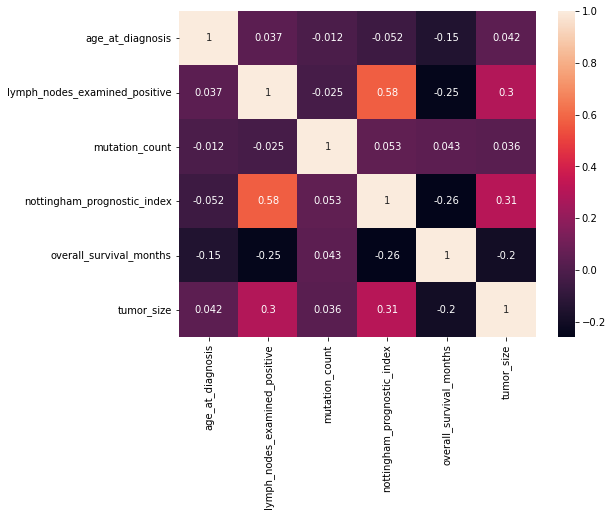

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

**CORRELACIÓN SÓLO VARIABLES GENÉTICAS**

In [ ]:
DF_GENETICA=df_Sin_Nulos.iloc[:,29:]
VariablesDG=DF_GENETICA.columns.to_list()

In [ ]:
num_columnas=DF_GENETICA._get_numeric_data().columns
len(num_columnas)

489

In [ ]:
num_columnas

Index(['brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2',
       'nbn', 'nf1',
       ...
       'srd5a1', 'srd5a2', 'srd5a3', 'st7', 'star', 'tnk2', 'tulp4', 'ugt2b15',
       'ugt2b17', 'ugt2b7'],
      dtype='object', length=489)

In [ ]:
cat_columnas_G=DF_GENETICA.select_dtypes(include=["category"]).columns.to_list()
len(cat_columnas_G)

173

In [ ]:
valores_unicos=[]
Variable=[]
MAX=[]
MIN=[]
for i in cat_columnas_G:
  Variable.append(i)
  valores_unicos.append(len(DF_GENETICA[i].unique()))
 
VN=pd.DataFrame({"Variable":Variable,"ValoresUnicos":valores_unicos})
VN

,Variable,ValoresUnicos
0,pik3ca_mut,125
1,tp53_mut,288
2,muc16_mut,225
3,ahnak2_mut,187
4,kmt2c_mut,155
5,syne1_mut,151
6,gata3_mut,99
7,map3k1_mut,123
8,ahnak_mut,116
9,dnah11_mut,122


In [ ]:
DF_GENETICA.ryr2_mut.value_counts()

0                1320
V873M               2
N1551S              2
S1295G              2
W526R               1
R1585C              1
R3397C              1
R3227H              1
R2979C              1
R2931C              1
R2920*              1
R272C T2116A        1
R2424K              1
R2267H              1
R1699C              1
R1500C              1
R3510H              1
R1482H              1
R1392K              1
R1119H              1
R1089C              1
Q859E               1
X563_splice         1
Q2692P              1
P3652S              1
P1857L              1
R3458Q              1
R3567H              1
X3646_splice        1
T1737S              1
V4768I              1
V342A               1
V3219M              1
V2154L              1
V1579M              1
T858M               1
T4113S              1
T25Rfs*69           1
T1863M              1
T1399K Y4250C       1
S1155T              1
T1276I              1
T1228N              1
S3592F P3579S       1
S3437*              1
S1967L    

In [ ]:
num_columnas

Index(['brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2',
       'nbn', 'nf1',
       ...
       'srd5a1', 'srd5a2', 'srd5a3', 'st7', 'star', 'tnk2', 'tulp4', 'ugt2b15',
       'ugt2b17', 'ugt2b7'],
      dtype='object', length=489)

In [ ]:
#corr_df1 = DF_GENETICA.corr(method='pearson')
#corr_df1

In [ ]:
#plt.figure(figsize=(20,20))
#sns.heatmap(corr_df1, cmap = "YlGnBu", linewidths=0.5)

**Analisis de Componentes Pricipales**

In [ ]:
num_columnas=df_Sin_Nulos._get_numeric_data().columns
len(num_columnas)

495

In [ ]:
## Eliminar Ruido
df_Sin_Nulos=df_Sin_Nulos.drop(cat_columnas_G,axis=1)

In [ ]:
df_Sin_Nulos.shape

(1423, 518)

In [ ]:
cat_columnas=df_Sin_Nulos.drop(['overall_survival'],axis=1).select_dtypes(include=["category"]).columns.to_list()
len(cat_columnas)

22

In [ ]:
datos=tabla_con_variables_seleccionadas(df_Sin_Nulos,num_columnas, cat_columnas)

In [ ]:
datos.shape

(1423, 554)

* Tenemos una Base Total de 554 Variables 

## **Modelo PCA**

La clase sklearn.decomposition.PCA incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento n_components determina el número de componentes calculados. Si se indica None, se calculan todas las posibles (min(filas, columnas) - 1).

Por defecto, PCA() centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. Una forma de hacerlo es combinar un StandardScaler() y un PCA() dentro de un pipeline. Para más información sobre el uso de pipelines consultar Pipeline y ColumnTransformer.

In [ ]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
R=pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns
 
)

In [ ]:
R

,age_at_diagnosis,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,tumor_size,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,mmp26,mmp27,mmp28,mmp3,mmp7,mmp9,mtor,nfkb1,nfkb2,opcml,pdgfa,pdgfb,pdgfra,pdgfrb,pdpk1,peg3,pik3ca,pik3r1,pik3r2,plagl1,ptk2,rab25,rad51,raf1,rassf1,...,fgf2,fn1,map2,map4,mapt,nr1i2,slco1b3,tubb1,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak,ahnak2,akap9,alk,apc,arid2,arid5b,asxl1,asxl2,bap1,bcas3,birc6,cacna2d3,ccnd3,chd1,clk3,clrn2,col12a1,col22a1,col6a3,ctcf,ctnna1,ctnna3,dnah11,dnah2,dnah5,dtwd2,fam20c,fanca,fancd2,flt3,foxp1,frmd3,gh1,gldc,gpr32,gps2,hdac9,herc2,hist1h2bc,kdm3a,kdm6a,klrg1,l1cam,lama2,lamb3,large1,ldlrap1,lifr,lipi,magea8,map3k10,map3k13,men1,mtap,muc16,myo1a,myo3a,ncoa3,nek1,nf2,npnt,nr2f1,nr3c1,nras,nrg3,nt5e,or6a2,palld,pbrm1,ppp2cb,ppp2r2a,prkacg,prkce,prkcq,prkcz,prkg1,prps2,prr16,ptpn22,ptprm,rasgef1b,rpgr,ryr2,sbno1,setd1a,setd2,setdb1,sf3b1,sgcd,shank2,siah1,sik1,sik2,smarcb1,smarcc1,smarcc2,smarcd1,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,type_of_breast_surgery_MASTECTOMY,cancer_type_Breast Sarcoma,cancer_type_detailed_Breast Invasive Ductal Carcinoma,cancer_type_detailed_Breast Invasive Lobular Carcinoma,cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma,cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma,cellularity_Low,cellularity_Moderate,chemotherapy_1,pam50_+_claudin-low_subtype_Her2,pam50_+_claudin-low_subtype_LumA,pam50_+_claudin-low_subtype_LumB,pam50_+_claudin-low_subtype_NC,pam50_+_claudin-low_subtype_Normal,pam50_+_claudin-low_subtype_claudin-low,cohort_2,cohort_3,cohort_4,cohort_5,er_status_measured_by_ihc_Positve,er_status_Positive,neoplasm_histologic_grade_2,neoplasm_histologic_grade_3,her2_status_measured_by_snp6_LOSS,her2_status_measured_by_snp6_NEUTRAL,her2_status_measured_by_snp6_UNDEF,her2_status_Positive,tumor_other_histologic_subtype_Lobular,tumor_other_histologic_subtype_Medullary,tumor_other_histologic_subtype_Mixed,tumor_other_histologic_subtype_Mucinous,tumor_other_histologic_subtype_Other,tumor_other_histologic_subtype_Tubular/ cribriform,hormone_therapy_1,inferred_menopausal_state_Pre,integrative_cluster_10,integrative_cluster_2,integrative_cluster_3,integrative_cluster_4ER+,integrative_cluster_4ER-,integrative_clus

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[7.03012925e-02 6.75355692e-02 5.17458729e-02 3.39143062e-02
 2.49738064e-02 2.05663732e-02 1.89997285e-02 1.63880789e-02
 1.56829332e-02 1.35028465e-02 1.16136528e-02 1.09530577e-02
 1.00719063e-02 9.03852456e-03 8.22010764e-03 7.74881724e-03
 7.12329318e-03 6.92352482e-03 6.72276561e-03 6.44667285e-03
 6.35301552e-03 6.13402893e-03 6.00253848e-03 5.80488034e-03
 5.64843975e-03 5.38530251e-03 5.26363977e-03 5.21357901e-03
 5.08136471e-03 4.78814818e-03 4.71081051e-03 4.68396197e-03
 4.50810710e-03 4.35735908e-03 4.30671625e-03 4.26012322e-03
 4.18807378e-03 4.07563248e-03 4.00809744e-03 3.98874916e-03
 3.83947610e-03 3.82076412e-03 3.73304379e-03 3.69003532e-03
 3.62750792e-03 3.58159530e-03 3.53557934e-03 3.50868345e-03
 3.42670583e-03 3.34300784e-03 3.32297099e-03 3.27120398e-03
 3.19289439e-03 3.16818195e-03 3.13514419e-03 3.

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.07030129 0.13783686 0.18958273 0.22349704 0.24847085 0.26903722
 0.28803695 0.30442503 0.32010796 0.33361081 0.34522446 0.35617752
 0.36624942 0.37528795 0.38350806 0.39125687 0.39838017 0.40530369
 0.41202646 0.41847313 0.42482615 0.43096017 0.43696271 0.44276759
 0.44841603 0.45380134 0.45906498 0.46427855 0.46935992 0.47414807
 0.47885888 0.48354284 0.48805095 0.49240831 0.49671502 0.50097515
 0.50516322 0.50923885 0.51324695 0.5172357  0.52107517 0.52489594
 0.52862898 0.53231902 0.53594653 0.53952812 0.5430637  0.54657238
 0.54999909 0.5533421  0.55666507 0.55993627 0.56312917 0.56629735
 0.56943249 0.5725121  0.57556677 0.57858954 0.58157329 0.58451618
 0.58742723 0.5903111  0.59315081 0.59595708 0.59875436 0.60152717
 0.60428848 0.60699823 0.60969527 0.61234585 0.61498161 0.61760721
 0.62021674 0.62279707 0.62537141 0.62789968 0.63040801 0.63289415


In [ ]:
(prop_varianza_acum[200])

0.8432634711219701

* Con 200 componentes se explica la varianza en un 84.3%
* Reduccionedo la dimension de 6271 a 650 Variables

**Trasformación**
Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [ ]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=200))
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
Columnas=[]
for i in range(200):
  j=i+1
  Columnas.append(("PC"+str(j)))

In [ ]:
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = Columnas,
    index   = datos.index
)
proyecciones.shape

(1423, 200)

**Export Base con Reduccion de Dimensionalidad**

In [ ]:
Base_PCA=pd.concat([proyecciones,df_Sin_Nulos['overall_survival']],axis=1, sort=False)

In [ ]:
Base_PCA.to_csv("/content/drive/MyDrive/Monografía - Asesoria Katherine R/2. Código Final - Colab/Base_PCA.csv",index=False)

In [ ]:
Base_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200,overall_survival
0,-5.974043,-9.584142,-11.482782,-0.277511,7.584545,7.198202,4.774512,-1.255848,1.367859,6.530592,-3.520126,-3.057595,1.229347,-0.724390,0.199540,-7.300644,2.120732,1.509762,-1.918872,1.522076,-2.333118,3.394002,0.064714,0.547565,1.895653,-2.392547,-0.774843,0.326039,-2.022598,-1.307441,-0.497226,-0.379149,3.294764,0.178976,-0.407258,-1.694950,0.316995,-0.792904,-1.108182,0.707436,2.702798,-0.762681,-3.721397,0.060424,2.364356,-2.549723,0.263045,-2.563432,-0.238072,1.027985,1.392866,2.024413,-2.491357,-3.206346,1.326152,2.379656,3.800170,1.244154,-2.671743,-2.454609,0.402395,1.172165,-1.196577,-1.549817,0.508430,-2.030045,-1.712861,-0.787402,-0.009142,-1.276015,-0.288524,-1.955568,-2.172660,-0.357896,-2.477108,0.830944,2.032623,-0.751574,0.108354,1.761667,0.028325,2.284887,-1.688287,-0.626163,0.115408,0.252449,-0.873542,-0.226299,1.388310,0.604741,0.600075,1.445092,0.909112,-1.677798,0.494735,0.058447,1.606271,-1.099890,1.059909,0.905345,-1.765180,1.424042,-0.377044,0.550652,-0.095747,-0.139874,0.263551,0.270334,2.330428,-1.773716,0.994444,-0.345241,-0.944336,0.723584,-1.079763,-0.570778,-0.619676,-2.382425,-1.240454,-0.065023,-1.078777,1.588386,1.062538,-0.186206,-0.465088,-1.651049,-0.933391,0.304331,0.124947,-0.276004,0.928270,0.911785,-0.592163,2.063719,-1.298839,0.481379,1.214518,-0.800275,-0.455569,0.154428,1.934760,-0.901306,1.121958,-0.043636,0.378693,-0.664899,-1.904036,-0.923158,0.613240,-2.062379,0.907885,0.446218,-0.146336,-0.048209,-0.650537,0.043873,-1.016153,-0.551202,-1.662801,-0.152762,0.633388,0.420636,0.995314,-1.019411,-1.475829,-0.140832,0.410748,1.347733,1.258784,-1.172319,-1.081625,0.215683,2.001771,0.236904,-0.969510,0.999070,-0.258269,0.667672,1.488892,1.096810,0.435519,-0.455253,-1.819866,0.695669,-0.557340,-1.272325,0.156250,0.914942,0.020072,0.559827,-0.836593,-0.397162,0.424592,-1.223337,0.774520,0.293799,0.426426,-0.562496,-0.289224,-0.818467,1
1,-4.281142,-0.808851,5.596248,1.297304,-0.554876,-1.447520,0.211546,-0.953895,0.276400,2.641465,-1.614250,4.340995,-0.291539,-3.683302,-0.402132,3.482767,-1.851423,0.332355,6.418053,0.153034,0.728044,0.303951,2.869072,0.731161,0.627283,-0.819179,-0.880900,-4.095026,0.561036,-2.799388,0.842278,-2.226545,1.699780,-0.640702,-1.589434,-1.408276,2.848930,1.268200,-1.826061,-1.380950,-2.734530,-1.612182,-0.430637,2.222316,0.033212,1.005082,-0.416931,-0.102720,-1.327020,-0.862531,2.661489,0.494533,-1.576672,1.102745,-1.376281,-1.052031,1.162457,1.531808,2.007822,-0.461457,1.996902,-1.644299,1.038318,0.301907,-0.378673,0.488130,0.425437,0.309025,1.484202,2.028943,-1.268234,0.867734,0.800812,-1.204259,-2.173746,0.728025,-1.108215,0.016997,-2.336330,-1.050886,0.506620,-2.084612,-2.046474,-0.008791,-0.837308,-0.466818,-2.027579,-1.146872,-2.718526,0.770134,0.341386,-0.557970,0.063615,0.971209,-0.303046,-0.728435,1.374277,1.152632,-1.663509,-1.933698,0.086089,1.543854,0.409093,1.

 ## **5) Selección de variables sugeridas por la literatura**

En total se seleccionaron 19 variables genèticas que por estudios las han clasificado como influyentes en el desarrollo del cáncer de mama, de las cuales sòlo se entontraron en la base de datos 13 tipo de genes

In [ ]:
DF_GENETICA.shape

(1423, 489)

In [ ]:
VariablesSugeridas=["brca1","brca2","pten","tp53","chek2","atm","cdh1","stk11","palb2","rad51c","rad51d","bard1","rad50"]

In [ ]:
DF_GENETICA=df_Sin_Nulos.iloc[:,29:]
VariablesDG=DF_GENETICA.columns.to_list()

In [ ]:
DF_3=pd.concat([df_Sin_Nulos.iloc[:,:29],DF_GENETICA[VariablesSugeridas]],axis=1, sort=False)

In [ ]:
DF_3.shape

(1423, 41)

In [ ]:
## Identificamos los tipos de variables nuevamente
VariablesNumericas=DF_3._get_numeric_data().columns.to_list()
print(f'Las variables numericas son {len(VariablesNumericas)}: {VariablesNumericas}')
VariablesTexto=DF_3.select_dtypes(include=["object"]).columns.to_list()
print(f'Las variables texto son {len(VariablesTexto)}: {VariablesTexto}')
VariablesCategoricas=DF_3.select_dtypes(include=["category"]).columns.to_list()
print(f'Las variables Tipo Categorica son {len(VariablesCategoricas)} : {VariablesCategoricas}')

Las variables numericas son 18: ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size', 'brca1', 'brca2', 'pten', 'tp53', 'chek2', 'atm', 'cdh1', 'stk11', 'palb2', 'rad51c', 'rad51d', 'bard1']
Las variables texto son 0: []
Las variables Tipo Categorica son 23 : ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'hormone_therapy', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'overall_survival', 'pr_status', 'radio_therapy', '3-gene_classifier_subtype', 'tumor_stage']


In [ ]:
cat_columnas=DF_3.drop(['overall_survival'],axis=1).select_dtypes(include=["category"]).columns.to_list()
len(cat_columnas)

22

In [ ]:
num_columnas=DF_3._get_numeric_data().columns
len(num_columnas)

18

In [ ]:
X_df3=tabla_con_variables_seleccionadas(DF_3,num_columnas, cat_columnas)
Y=DF_3['overall_survival']
DF_Sugerida=pd.concat([X_df3,DF_3['overall_survival']],axis=1, sort=False)

In [ ]:
DF_Sugerida.shape

(1423, 79)

In [ ]:
DF_Sugerida.to_csv("https://raw.githubusercontent.com/katherine2022Udea/TesisEspecializacion/main/BD_Experimento_III.csv",index=False)